In [3]:
import os
import pandas as pd
pd.set_option('display.max_colwidth',0)
import matplotlib.pyplot as plt 
import re
from transformers import AutoTokenizer,AutoModelForTokenClassification,AutoModelForSeq2SeqLM

In [7]:
from transformers import pipeline

2025-07-23 20:18:38.203346: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753291118.221300   18228 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753291118.226838   18228 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753291118.240668   18228 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753291118.240687   18228 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753291118.240689   18228 computation_placer.cc:177] computation placer alr

In [8]:
os.listdir()

['NER and SUMMERIZATION',
 'FIRST PROJECT',
 'ner and sum.ipynb',
 '.ipynb_checkpoints',
 're_sub_examples_arabic.pdf']

In [9]:
path='/home/eng-mohamed-hassan/NLP/NER and SUMMERIZATION/archive'

In [10]:
data=[]
for label in os.listdir(path):
    label_path=os.path.join(path,label)
    
    for text in os.listdir(label_path):
        text_path=os.path.join(label_path,text)
        try:
            with open (text_path,'r',encoding= 'utf-8') as f:
                txt_data=f.read().strip()
                data.append({'text':txt_data,'label':label})
        except exception as e:
            print(f'reading error name:{text},label:{label}--:',e)
            
    

In [11]:
df=pd.DataFrame(data)

In [12]:
print(df.columns)
print(df.shape)
print(df.info())

Index(['text', 'label'], dtype='object')
(45500, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45500 entries, 0 to 45499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    45500 non-null  object
 1   label   45500 non-null  object
dtypes: object(2)
memory usage: 711.1+ KB
None


In [13]:
print(df['text'].max())

❊‬ د‮. ‬محمد سليمان النور‮ أعلى الإسلام من قيمة العمل،‮ ‬وحضّ عليه،‮ ‬وبيَّن النبي‮ ‬صلى الله عليه وسلم، ‬فضل العمل فقال‮: «‬لأن‮ ‬يحتطب أحدكم حزمةً‮ ‬على ظهره خير من أن‮ ‬يسأل أحداً فيعطيه أو‮ ‬يمنعه‮»‬،‮ ‬وقال‮: «‬ما أكل أحد طعاماً‮ ‬قط خيراً‮ ‬من أن‮ ‬يأكل من عمل‮ ‬يده، وإن نبي‮ ‬الله داوود كان‮ ‬يأكل من عمل‮ ‬يده‮».‮ ‬قال بعض العلماء‮: «‬والحكمة في‮ ‬تخصيص داوود بالذكر أن اقتصاره في‮ ‬أكله على ما‮ ‬يعمله بيده لم‮ ‬يكن من الحاجة،‮ ‬لأنه كان خليفةً في‮ ‬الأرض،‮ ‬كما قال الله تعالى،‮ ‬وإنما ابتغى الأكل من طريق الأفضل؛ ولهذا أورد النبي‮ ‬صلى الله عليه وسلم قصته في‮ ‬مقام الاحتجاج بها على ما قدمه من أن خير الكسب عمل اليد‮». ‬ ومن العمل المشروع الطيب‮: ‬إجارة الإنسان نفسه للعمل عند الآخرين،‮ ‬وقد أجر النبي‮ ‬صلى الله عليه وسلم‮ ‬نفسه قبل النبوة راعياً للغنم،‮ ‬فقد قال‮: «‬ما بعث الله نبياً‮ ‬إلا رعى الغنم،‮ ‬فقال أصحابه‮: ‬وأنت؟ فقال‮: ‬نعم كنت أرعاها على قراريط لأهل مكة‮». ‬‮ ‬والأجير ضعيف جانبه في‮ ‬الغالب بالنسبة لمؤجّره،‮ ‬وهو مظنة وقوع الحيف والظلم عليه،‮ ‬والعرب لهذا المعنى تسمي‮ ‬

In [14]:
print(df['text'].sample(5))

36675    أطلق رئيس الوزراء الإسرائيلي بنيامين نتنياهو، زعيم حزب الليكود الأوفر حظاً للفوز في الانتخابات التشريعية المقررة في 22 يناير/كانون الثاني، مساء الثلاثاء حملته الانتخابية، مؤكداً ان أولويته هي وقف البرنامج النووي الإيراني . وقال نتنياهو أمام حشد من أنصاره في القدس من هو المرشح الذي يعتبره الناخبون الأقدر على الوقوف في وجه التهديد الإيراني وفي وجه التهديد المرتبط بالصواريخ وفي وجه تهديد الإرهاب . وأضاف ما زال لدينا الكثير للقيام به . قبل كل شيء، علينا وقف البرنامج النووي الإيراني، والوقت يمر . هذه هي مهمتي الأولى كرئيس للوزراء .من جهة ثانية، استعرض نتنياهو في خطاب تدشين الحملة الانتخابية وبشكل مفصل الإنجازات العديدة والكبيرة لحكومته على الصعيد الاقتصادي في حين لم يأت على ذكر الملف الفلسطيني الا لماماً . وفي هذا الشأن قال نتنياهو إن يدنا ستبقى دوماً ممدودة إلى جيراننا من أجل سلام حقيقي ومتبادل، مع الاستمرار في نفس الوقت في التشديد على المصالح الحيوية لدولة إسرائيل رغم كل الضغوط . ووعد نتنياهو أيضاً بتعزيز الاستيطان، وقال بعون الله سنواصل العيش والبناء في القدس التي ستبقى دوما غير

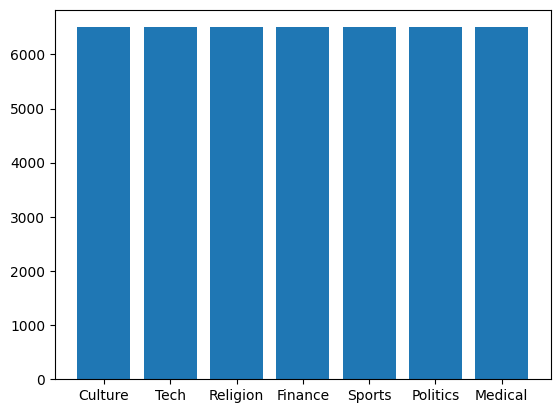

In [15]:
plt.bar(df['label'].value_counts().index,df['label'].value_counts())
plt.show()

In [16]:
df=df[df['text'].str.len()>20]

In [17]:
df.shape

(45499, 2)

In [18]:
def clean(x):
    x=re.sub(r'(.)\1{2,}',r'\1',x)
    return x

In [19]:
def slicing(text,max_w):
    words=text.split()
    sliced=[]
    for i in range(0,len(words),max_w) :
        pre_sliced=words[i:i+max_w]
        sliced.append(' '.join(pre_sliced))
    return sliced    

In [20]:
def subclean(x):
    for i in range(len(x)):
        x[i]=x[i].replace('\u202c','').replace('\u202e','').replace('\u202d','')
    return x

In [21]:
df['text']=df['text'].apply(clean)

In [22]:
df['text']=df['text'].apply(lambda x: slicing(x,100))

In [23]:
df['text']=df['text'].apply(subclean)

In [24]:
df=df.drop_duplicates(subset=['text'])

In [25]:
print(df.shape)

(45484, 2)


In [26]:
mar_model='CAMeL-Lab/bert-base-arabic-camelbert-msa-ner'

In [27]:
tokenizer=AutoTokenizer.from_pretrained(mar_model)
model=AutoModelForTokenClassification.from_pretrained(mar_model)

Some weights of the model checkpoint at CAMeL-Lab/bert-base-arabic-camelbert-msa-ner were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [28]:
ner_pipeline=pipeline(
                      'ner',
                      model=model
                      ,tokenizer=tokenizer
                      ,aggregation_strategy='simple'
                     )

Device set to use cpu


In [29]:
sample=df['text'].sample(2)

In [30]:
def ner(x):
    lst=[]
    for i in range(len(x)):
        lst.append(ner_pipeline(x[i]))
    return lst    

In [31]:
output=sample.apply(ner)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [32]:
print(output)

14582    [[], [], [{'entity_group': 'MISC', 'score': 0.9755588, 'word': 'الله', 'start': 442, 'end': 446}], [{'entity_group': 'MISC', 'score': 0.97777665, 'word': 'الله', 'start': 517, 'end': 521}], [{'entity_group': 'PERS', 'score': 0.9077625, 'word': 'محمد', 'start': 147, 'end': 151}, {'entity_group': 'MISC', 'score': 0.7289612, 'word': 'الله', 'start': 156, 'end': 160}, {'entity_group': 'MISC', 'score': 0.9603128, 'word': 'الله', 'start': 215, 'end': 219}], [{'entity_group': 'MISC', 'score': 0.9632148, 'word': 'الله', 'start': 172, 'end': 176}, {'entity_group': 'MISC', 'score': 0.9661184, 'word': 'الله', 'start': 186, 'end': 190}, {'entity_group': 'MISC', 'score': 0.962573, 'word': 'الله', 'start': 351, 'end': 355}], [{'entity_group': 'MISC', 'score': 0.96793914, 'word': 'الله', 'start': 53, 'end': 57}, {'entity_group': 'MISC', 'score': 0.96984184, 'word': 'الله', 'start': 67, 'end': 71}, {'entity_group': 'MISC', 'score': 0.96880585, 'word': 'الله', 'start': 162, 'end': 166}], [], [

In [33]:
sample_df=pd.DataFrame(output[0:1])

In [34]:
print(sample_df)

In [35]:
def reversed_slicing(x):
    r_s=[]
    for i in x:
        r_s+=i
    return r_s    

In [36]:
def order(x):
    entity_group=[]
    score=[]
    word=[]
    start=[]
    end=[]
    for chunk in x :
        for i in chunk :
            entity_group.append(i['entity_group'])
            word.append(i['word'])
            score.append(i['score'])
            start.append(i['start'])
            end.append(i['end'])
    return pd.DataFrame({
         'entity_group':entity_group,
         'word':word,
         'score':score,
         'start':start,
         'end':end
     })
         

In [37]:
ggg=sample_df.apply(reversed_slicing).apply(order)

ValueError: If using all scalar values, you must pass an index

In [5]:
s_model=('')
summ_model=AutoModelForSeq2SeqLM.from_pretrained(s_model)
s_tokenizer=AutoTokenizer.from_pretrained(s_model)


OSError: We couldn't connect to 'https://huggingface.co' to load the files, and couldn't find them in the cached files.
Check your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/transformers/installation#offline-mode'.